## Code sample: Titanic 

### **Tianyu Ding**

This is my code example of famous kaggle competition: ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic).

In [216]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.neural_network import MLPClassifier

### Import data and check it

In [217]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
fullset = pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop = True)
print (train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [218]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [220]:
# continuous
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:
# categorical
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nicholls, Mr. Joseph Charles",male,1601,G6,S
freq,1,577,7,4,644


In [222]:
# missing data
# Fill empty and NaNs values with NaN
fullset = fullset.fillna(np.nan)

# Check for Null values
fullset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Exploratory data analysis

### Continuous features correlation to outcome

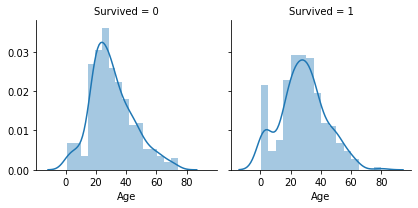

In [223]:
# age distribution by survival
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Age')


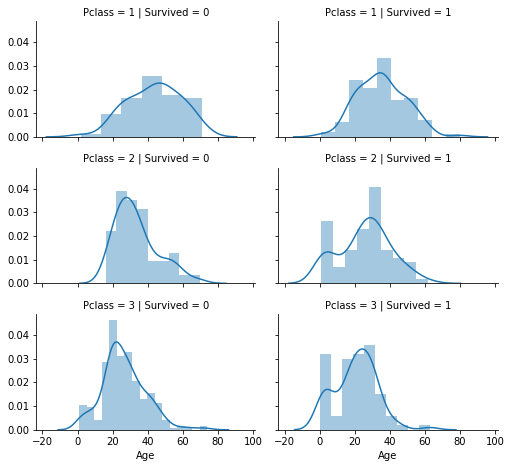

In [224]:
# age distribution by class and survival status
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(sns.distplot, 'Age')
grid.add_legend();

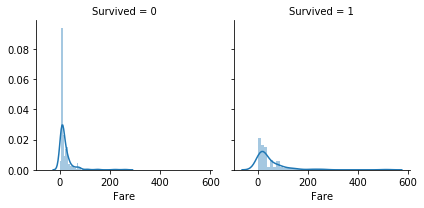

In [225]:
# Fare distribution
# Explore Fare distribution 
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Fare')

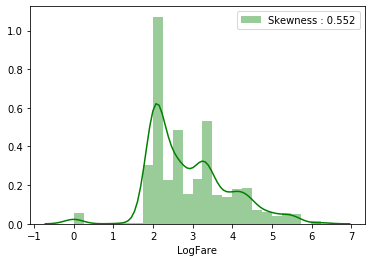

In [226]:
# Apply log to Fare to reduce skewness distribution
fullset["LogFare"] = fullset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(fullset["LogFare"], color="g", label=f"Skewness : {round(fullset['LogFare'].skew(), 3)}")
g = g.legend(loc="upper right")

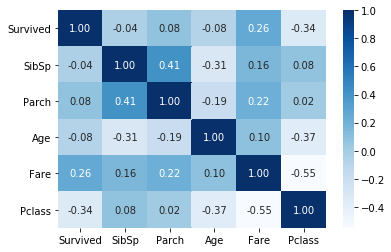

In [227]:
#correlation plot
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare","Pclass"]].corr(),annot=True, fmt = ".2f", cmap = "Blues")

**Findings**: 
1. clear age peak in surival group around 0-5 age.
2. Fare is very skewed. Consider log transformation to reduce skewness.
3. Class, Sibsp, Parch are relatively strong correlated with Age, might use them to fill missing Age in next step.

### Categorical correlation to outcome

C:\Users\dty\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dty\Anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


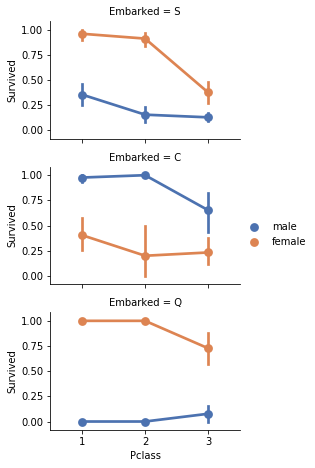

In [228]:
#survival rate by class and sex using point plot
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\dty\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


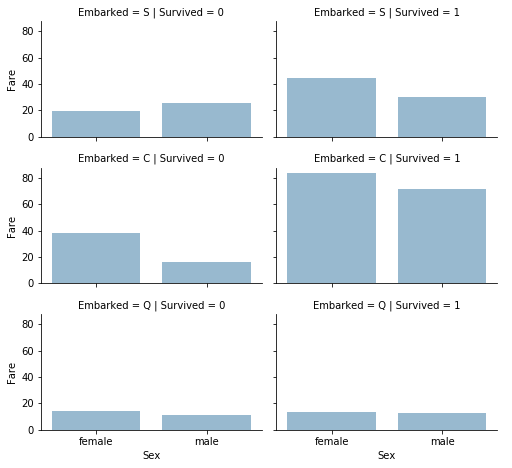

In [229]:
# survival rate by Embarked and sex
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Findings**: 
1. Overall, higher class, higher survival rate
2. Female was with higher survival rate than male except people who embarked from 'Cherbourg'
3. **"Women and children first" is not just a slogan**

## Dealing with missing data

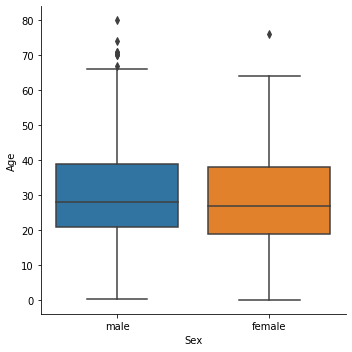

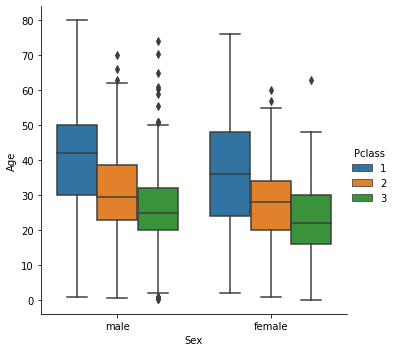

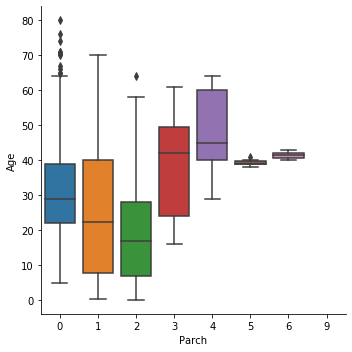

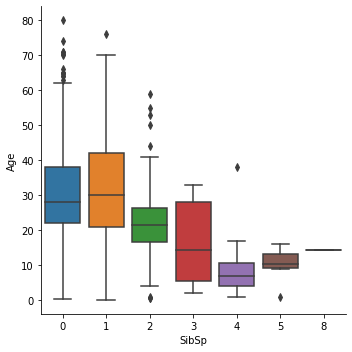

In [230]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.catplot(y="Age",x="Sex",data=fullset,kind="box")
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=fullset,kind="box")
g = sns.catplot(y="Age",x="Parch", data=fullset,kind="box")
g = sns.catplot(y="Age",x="SibSp", data=fullset,kind="box")

In [231]:
# convert Sex into categorical value 0 for male and 1 for female
fullset["Sex"] = fullset["Sex"].map({"male": 0, "female":1})

In [232]:
# Fill Age with the median age of people who were with similiar Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(fullset["Age"][fullset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = fullset["Age"].median()
    age_pred = fullset["Age"][((fullset['SibSp'] == fullset.iloc[i]["SibSp"]) & 
                               (fullset['Parch'] == fullset.iloc[i]["Parch"]) & 
                               (fullset['Pclass'] == fullset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        fullset['Age'].iloc[i] = age_pred
    else :
        fullset['Age'].iloc[i] = age_med


C:\Users\dty\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\dty\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Feature Engineer

In [233]:
#check name
fullset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [234]:
# Get Title from Name
title = [i.split(",")[1].split(".")[0].strip() for i in fullset["Name"]]
fullset["Title"] = pd.Series(title)
fullset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

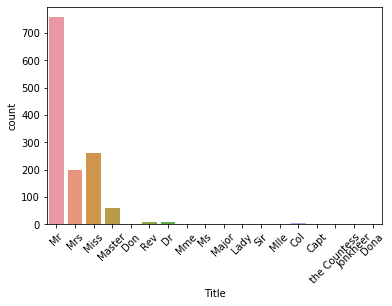

In [235]:
g = sns.countplot(x="Title",data=fullset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [236]:
# Merge categories with small number and convert to numeric
fullset["Title"] = fullset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
fullset["Title"] = fullset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
fullset["Title"] = fullset["Title"].astype(int)

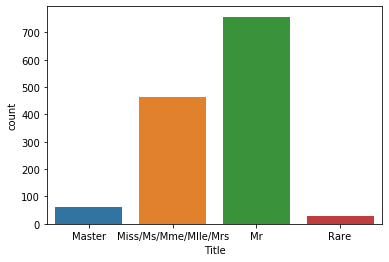

In [237]:
g = sns.countplot(fullset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

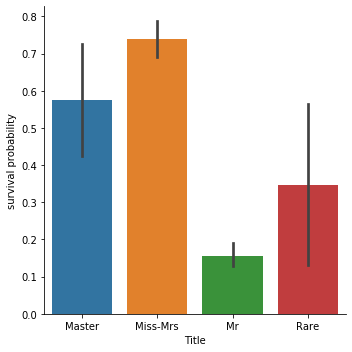

In [238]:
g = sns.catplot(x="Title",y="Survived",data=fullset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

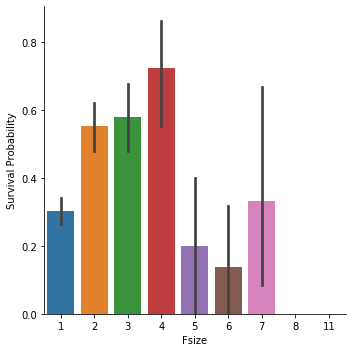

In [239]:
# Check family size
fullset["Fsize"] = fullset["SibSp"] + fullset["Parch"] + 1
g = sns.catplot(x="Fsize",y="Survived",data = fullset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [240]:
# Partion family size
fullset['Single'] = fullset['Fsize'].map(lambda s: 1 if s == 1 else 0)
fullset['SmallF'] = fullset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
fullset['MedF'] = fullset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
fullset['LargeF'] = fullset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

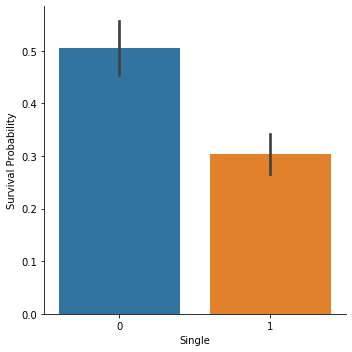

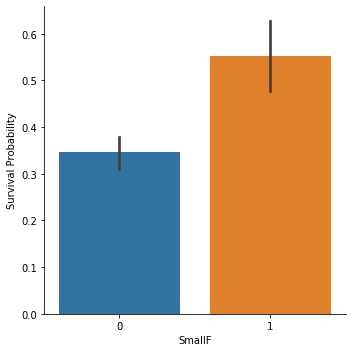

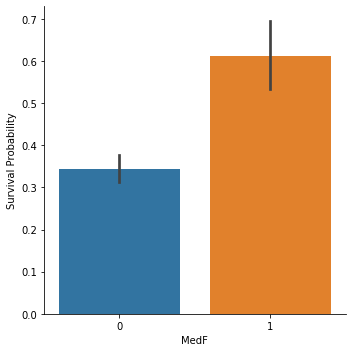

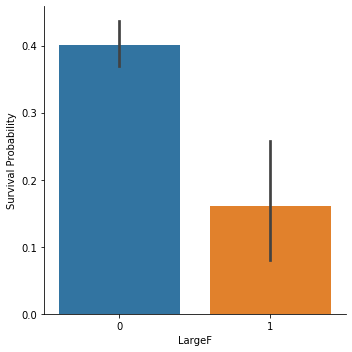

In [241]:
g = sns.catplot(x="Single",y="Survived",data=fullset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="SmallF",y="Survived",data=fullset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="MedF",y="Survived",data=fullset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="LargeF",y="Survived",data=fullset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [242]:
# create dummy variables
fullset = pd.get_dummies(fullset, columns = ["Title"])
fullset = pd.get_dummies(fullset, columns = ["Embarked"], prefix="Em")

In [243]:
fullset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,1


In [244]:
# check cabin and make dummy
fullset = pd.get_dummies(fullset, columns = ["Cabin"],prefix="Cabin")

In [245]:
# check ticket
fullset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [246]:
Ticket = []
for i in list(fullset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
fullset["Ticket"] = Ticket
fullset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [247]:
fullset = pd.get_dummies(fullset, columns = ["Ticket"], prefix="T")

In [248]:
# Create categorical values for Pclass
fullset["Pclass"] = fullset["Pclass"].astype("category")
fullset = pd.get_dummies(fullset, columns = ["Pclass"],prefix="Pc")

In [249]:
#drop id, Fare
fullset.drop(labels = ["PassengerId", "Fare", "Name"], axis = 1, inplace = True)

In [250]:
fullset.info

<bound method DataFrame.info of       Survived  Sex   Age  SibSp  Parch   LogFare  Fsize  Single  SmallF  \
0          0.0    0  22.0      1      0  1.981001      2       0       1   
1          1.0    1  38.0      1      0  4.266662      2       0       1   
2          1.0    1  26.0      0      0  2.070022      1       1       0   
3          1.0    1  35.0      1      0  3.972177      2       0       1   
4          0.0    0  35.0      0      0  2.085672      1       1       0   
...        ...  ...   ...    ...    ...       ...    ...     ...     ...   
1304       NaN    0  25.0      0      0  2.085672      1       1       0   
1305       NaN    1  39.0      0      0  4.690430      1       1       0   
1306       NaN    0  38.5      0      0  1.981001      1       1       0   
1307       NaN    0  25.0      0      0  2.085672      1       1       0   
1308       NaN    0  16.0      1      1  3.107198      3       0       0   

      MedF  ...  T_STONO  T_STONO2  T_STONOQ  T_SWPP  T

## Model comparison

In [189]:
## Separate train dataset and test dataset
train = fullset[:len(train_df)]
test = fullset[len(train_df):]
test.drop(labels=["Survived"],axis = 1,inplace=True)

C:\Users\dty\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [190]:
## Separate train features and label 
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

C:\Users\dty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

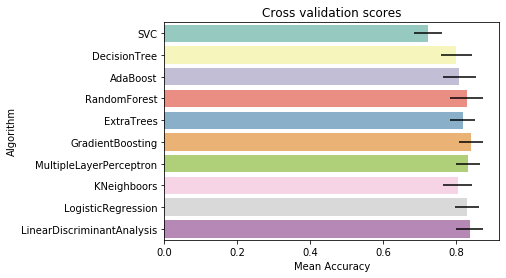

In [192]:
# Modeling step Test differents algorithms 
random_state = 666
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                      random_state=random_state,
                                      learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

# loop over classifiers
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### Tuning parameters for better performance

In [193]:
# Adaboost
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=666)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 1080 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 1120 out of 1120 | elapsed:    4.1s finished


0.8182272159800249

In [195]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [False],
                  "n_estimators" :[100,300],
                  "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   18.9s
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:   22.5s finished


0.8271910112359551

In [196]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
# Best score
gsGBC.best_score_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   16.9s finished


0.8417727840199749

In [198]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   19.8s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   30.2s finished


0.8327590511860175

#### Learning curve

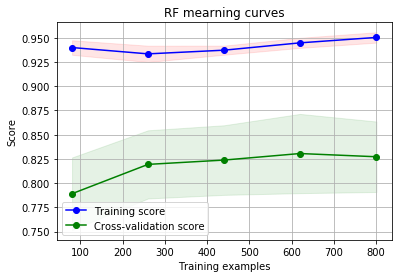

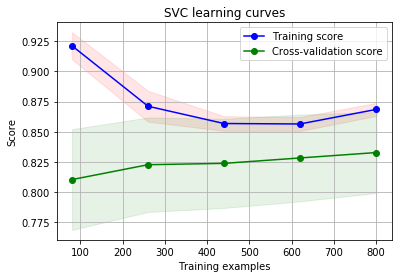

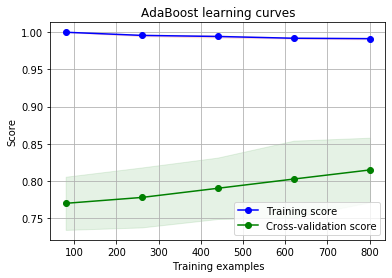

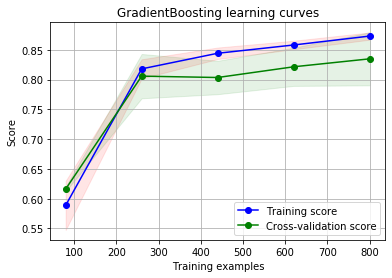

In [201]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

#### Feature importance of tree-based models

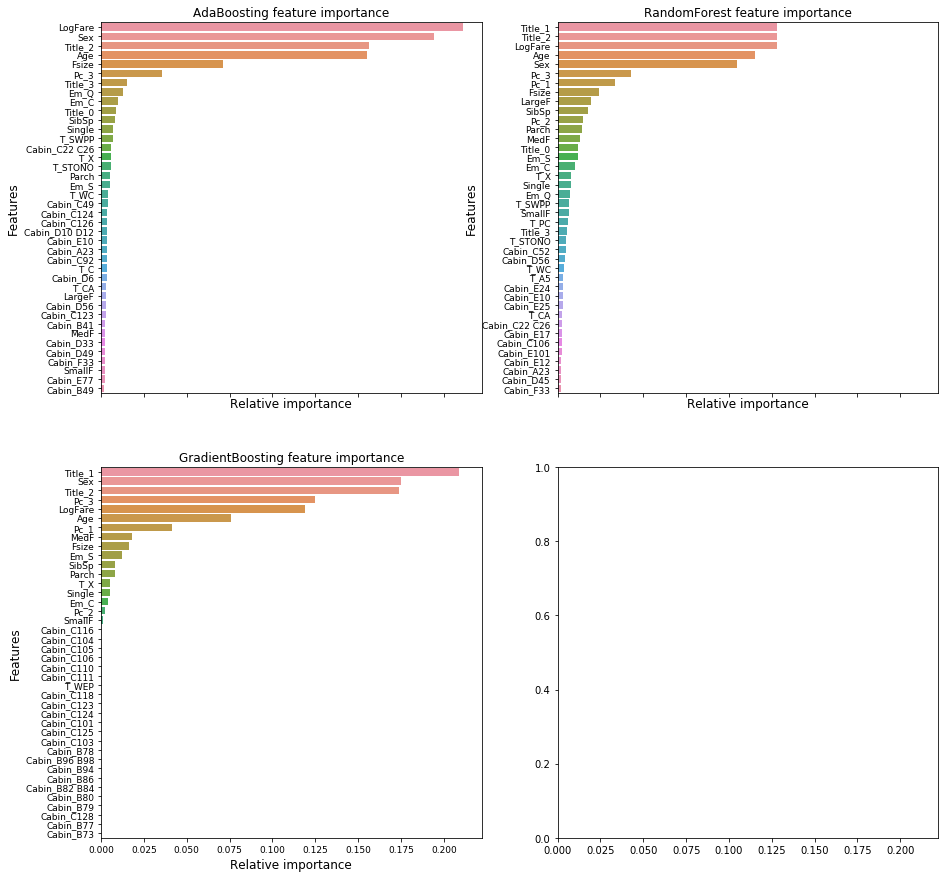

In [206]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))
names_classifiers = [("AdaBoosting", ada_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]
nclassifier = 0

for row in range(nrows):
    for col in range(ncols):
        if nclassifier < len(names_classifiers):
            name = names_classifiers[nclassifier][0]
            classifier = names_classifiers[nclassifier][1]
            indices = np.argsort(classifier.feature_importances_)[::-1][:40]
            g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
            g.set_xlabel("Relative importance",fontsize=12)
            g.set_ylabel("Features",fontsize=12)
            g.tick_params(labelsize=9)
            g.set_title(name + " feature importance")
            nclassifier += 1


#### Use the best one to predict test set

In [207]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('svc', SVMC_best), 
                                       ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [215]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")
results = pd.concat([test_df['PassengerId'],test_Survived],axis=1)
results[:6]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
